In [1]:
import rasterio
from rasterio.plot import show
from rasterio.merge import merge
from rasterio.plot import show
import rasterio.features
import rasterio.warp
import glob
import os
import rioxarray as xr
import pandas as pd
import geopandas as gpd
import numpy as np
from rasterio.enums import Resampling
from rasterio.crs import CRS
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.plot as ep
from shapely.geometry import mapping
import subprocess
from osgeo import gdal
import multiprocessing as mp
from typing import List, Any, Sequence, Tuple
import xarray as xarray
from numpy import savetxt
from matplotlib.colors import colorConverter
import scipy



%matplotlib inline


## Importing the classifiied arrays

In [ ]:
image_1 = np.load('/gws/nopw/j04/ai4er/users/jl2182/data/Figures/PIREDD_Classified/Corrected_Classified/PIREDD_Plataue_L8_2018_corrected_classified.npy')
image_2 = np.load('/gws/nopw/j04/ai4er/users/jl2182/data/Figures/PIREDD_Classified/Corrected_Classified/PIREDD_Plataue_L8_2020_classified.npy')

In [ ]:
image_1 = image_1.astype(int)
image_2 = image_2.astype(int)

In [8]:
valid_pixel = np.load('/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/valid_pixels.npy')

In [ ]:
np.count_nonzero(valid_pixel == 0)

In [ ]:
#visualise boths landcover maps

# See https://github.com/matplotlib/matplotlib/issues/844/
n = image_1.max()
# Next setup a colormap for our map
colors = dict((
    (1, (111, 97, 6,255)),  # Cropland (brown)
    (2, (135, 198, 42,255)),  # Shrubland (light green)
    (3, (15, 91, 3,255)),  # Forest (dark green)
    (4, (255, 26, 0,255)),  # Urban (red)
    (5, (0, 0, 255,255)),  # Water (blue)
    (6, (0, 0, 0,0)) #No Data/Clouds
))
# Put 0 - 255 as float 0 - 1
for k in colors:
    v = colors[k]
    _v = [_v / 255.0 for _v in v]
    colors[k] = _v
    
index_colors = [colors[key] if key in colors else 
                (255, 255, 255, 0) for key in range(1, n + 1)]
cmap = plt.matplotlib.colors.ListedColormap(index_colors, 'Classification', n)

# Now show the classmap next to the image
#plt.figure(figsize = (8,8))
plt.subplot(121)
plt.title('Year 1')
plt.imshow(image_1, cmap=cmap, interpolation='none')

#plt.figure(figsize = (8,8))
plt.subplot(122)
plt.title('Year 2')
plt.imshow(image_2, cmap=cmap, interpolation='none')

plt.show()

## Plotting Deforestation Change Map

In [ ]:
A = np.ones(image_1.shape)
for i in range(image_1.shape[0]):
    for j in range(image_1.shape[1]):
        if image_1[i,j] == 3 and image_1[i,j] == image_2[i,j]:
            A[i,j] = 0 #no change
        if image_1[i,j] == 3 and image_1[i,j] != image_2[i,j]:
            A[i,j] = 1 #change
        else:
            A[i,j] = 0 #blank out all other pixels/changes

In [ ]:
np.count_nonzero(A > 0)

In [ ]:
A = A.astype(int)
A

In [ ]:
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if valid_pixel[i,j] == 0:
            A_valid[i,j] == 0

In [ ]:
np.count_nonzero(A > 0)

In [ ]:
np.save('/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/PIREDD_2019_Landcover_Change_Map.npy', A)

In [ ]:
colour_1 = colorConverter.to_rgba('white',alpha=0.0)
colour_2 = 'red'
colour_3 = colorConverter.to_rgba('white',alpha=0.0)
cmap_2 = plt.matplotlib.colors.ListedColormap([colour_1, colour_2, colour_3])
plt.title('Change Map identifying Deforestation Events')
plt.imshow(A, cmap = cmap_2)
plt.savefig('/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/PIREDD_2019_Landcover_Change_Map.tif')
plt.savefig('/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/PIREDD_2019_Landcover_Change_Map.png')

## Plotting Forest To Cropland Change Map


In [ ]:
B = np.ones(image_1.shape)
for i in range(image_1.shape[0]):
    for j in range(image_1.shape[1]):
        if image_1[i,j] == 3 and image_1[i,j] == image_2[i,j]:
            B[i,j] = 0 #no change
        if image_1[i,j] == 3 and image_2[i,j] == 1:
            B[i,j] = 1 #change
        else:
            B[i,j] = 0 #blank out all other pixels/changes

In [ ]:
B = B.astype(int)
B

In [ ]:
np.count_nonzero(B == 1)

In [ ]:
B_valid = np.where(valid_pixel == 0,0,B)

In [ ]:
np.count_nonzero(B_valid == 1)

## Plotting Shrubland to Cropland

In [ ]:
C = np.ones(image_1.shape)
for i in range(image_1.shape[0]):
    for j in range(image_1.shape[1]):
        if image_1[i,j] == 3 and image_1[i,j] == image_2[i,j]:
            C[i,j] = 0 #no change
        if image_1[i,j] == 2 and image_2[i,j] == 1:
            C[i,j] = 1 #change
        else:
            C[i,j] = 0 #blank out all other pixels/changes

In [ ]:
np.count_nonzero(C == 1)

In [ ]:
C = C.astype(int)
C

In [ ]:
C_valid = np.where(valid_pixel == 0,0,C)

In [ ]:
C_valid

In [ ]:
np.count_nonzero(C_valid == 1)

## Plotting Forest to Shrubland

In [ ]:
D = np.ones(image_1.shape)
for i in range(image_1.shape[0]):
    for j in range(image_1.shape[1]):
        if image_1[i,j] == 3 and image_1[i,j] == image_2[i,j]:
            D[i,j] = 0 #no change
        if image_1[i,j] == 3 and image_2[i,j] == 2:
            D[i,j] = 1 #change
        else:
            D[i,j] = 0 #blank out all other pixels/changes

In [ ]:
D = D.astype(int)
D

In [ ]:
np.count_nonzero(D == 1)

In [ ]:
D_valid = np.where(valid_pixel == 0,0,D)

In [ ]:
np.count_nonzero(D_valid == 1)

## Comparing to Hansen and LandTrendr

In [ ]:
#import both change maps
Hansen_Path = '/gws/nopw/j04/ai4er/users/jl2182/data/Mres_Data/Hansen_Results/PIREDD/PIREDD_Plataue_Hansen_Loss_2019_resampled.tif'
Hansen = xr.open_rasterio(Hansen_Path)


In [ ]:
LandTrendr_Path = '/gws/nopw/j04/ai4er/users/jl2182/data/Mres_Data/LandTrendr_Results/PIREDD_Plateau/Change_Maps/PIREDD_Plateau_year_of_change_map_resampled.tif'
LandTrendr = xr.open_rasterio(LandTrendr_Path)


In [ ]:
LandTrendr[0].max

In [ ]:
Landtrendr = np.where(LandTrendr == 2013, 1, 0)

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Open the file:
raster = rasterio.open('/gws/nopw/j04/ai4er/users/jl2182/data/Mres_Data/PIREDD_Test_Data/Filled/PIREDD_Plataue_L8_2013_filled.tif')

# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

# Convert to numpy arrays
nir = raster.read(4)
red = raster.read(3)
green = raster.read(2)

# Normalize band DN
nir_norm = normalize(nir)
red_norm = normalize(red)
green_norm = normalize(green)

# Stack bands
nrg = np.dstack((nir_norm, red_norm, green_norm))

# View the color composite



In [ ]:
colour_1 = colorConverter.to_rgba('white',alpha=0.0)
colour_2 = 'white'
colour_3 = colorConverter.to_rgba('white',alpha=0.0)
cmap1 = plt.matplotlib.colors.ListedColormap([colour_1, colour_2, colour_3])

colour_4 = colorConverter.to_rgba('white',alpha=0.0)
colour_5 = 'yellow'
colour_6 = colorConverter.to_rgba('white',alpha=0.0)
cmap2 = plt.matplotlib.colors.ListedColormap([colour_4, colour_5, colour_6])

colour_7 = colorConverter.to_rgba('white',alpha=0.0)
colour_8 = 'red'
colour_9 = colorConverter.to_rgba('white',alpha=0.0)
cmap3 = plt.matplotlib.colors.ListedColormap([colour_7, colour_8, colour_9])

colour_10 = colorConverter.to_rgba('white',alpha=0.0)
colour_11 = 'orange'
colour_12 = colorConverter.to_rgba('white',alpha=0.0)
cmap4 = plt.matplotlib.colors.ListedColormap([colour_10, colour_11, colour_12])



In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(nrg)
plt.imshow(Hansen[0], cmap = cmap1)
#plt.imshow(LandTrendr[0], cmap = cmap2)
plt.imshow(B_valid, cmap = cmap2, label ="Forest To Cropland")
plt.imshow(C_valid, cmap = cmap3, label ="shrubland To Cropland")
plt.imshow(D_valid, cmap = cmap4, label ="Forest To Shrubland")

#plt.savefig('/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Conversion_Change_Maps/2013_Landcover')

## Comparison of Change (LC, LT and GFC)  

In [362]:
image_1 = np.load('/gws/nopw/j04/ai4er/users/jl2182/data/Figures/PIREDD_Classified/Corrected_Classified/PIREDD_Plataue_L8_2013_classified.npy')
image_2 = np.load('/gws/nopw/j04/ai4er/users/jl2182/data/Figures/PIREDD_Classified/Corrected_Classified/PIREDD_Plataue_L8_2015_corrected_classified.npy')

In [363]:
image_1 = image_1.astype(int)
image_2 = image_2.astype(int)

In [296]:
Hansen = np.load('/gws/nopw/j04/ai4er/users/jl2182/data/Mres_Data/Hansen_Results/loss_year/resampled/loss_year_19.npy')

In [297]:
LandTrendr_path = '/gws/nopw/j04/ai4er/users/jl2182/data/Mres_Data/LandTrendr_Results/PIREDD_Plateau/Change_Maps/PIREDD_Plateau_year_of_change_map.tif'
LandTrendr = xr.open_rasterio(LandTrendr_path)

In [298]:
np.unique(LandTrendr)

array([   0, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int16)

In [299]:
LandTrendr_2014 = np.where(LandTrendr == 2019,1,0)

In [300]:
LandTrendr_2014.shape

(1, 9177, 8405)

In [301]:
#resample annual image
import scipy.ndimage

LandTrendr_2014_Resampled = scipy.ndimage.zoom(LandTrendr_2014[0],0.0974786, order=0)
LandTrendr_2014_Resampled.shape

(895, 819)

In [328]:
#forest to shrubland
f_s = np.ones(image_1.shape)
for i in range(image_1.shape[0]):
    for j in range(image_1.shape[1]):
        if image_1[i,j] == 3 and image_1[i,j] == image_2[i,j]:
            f_s[i,j] = 0 #no change
        if image_1[i,j] == 3 and image_2[i,j] !=3:
            f_s[i,j] = 1 #change
        else:
            f_s[i,j] = 0 #blank out all other pixels/changes


In [329]:
f_s_valid = np.where(valid_pixel == 1, f_s, 0)

In [364]:
#forest to cropland
f_c = np.ones(image_1.shape)
for i in range(image_1.shape[0]):
    for j in range(image_1.shape[1]):
        if image_1[i,j] == 3 and image_1[i,j] == image_2[i,j]:
            f_c[i,j] = 0 #no change
        if image_1[i,j] == 3 and image_2[i,j] ==1:
            f_c[i,j] = 1 #change
        else:
            f_c[i,j] = 0 #blank out all other pixels/changes


In [365]:
f_c_valid = np.where(valid_pixel == 1, f_c, 0)

In [366]:
np.save('/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/Landcover_Change_Maps_npy/PIREDD_2014_Landcover_Change_Map_fc.npy',f_c)

In [367]:
#shrubland to cropland
s_c = np.ones(image_1.shape)
for i in range(image_1.shape[0]):
    for j in range(image_1.shape[1]):
        if image_1[i,j] == 2 and image_1[i,j] == image_2[i,j]:
            s_c[i,j] = 0 #no change
        if image_1[i,j] == 2 and image_2[i,j] == 1:
            s_c[i,j] = 1 #change
        else:
            s_c[i,j] = 0 #blank out all other pixels/changes


In [368]:
s_c_valid = np.where(valid_pixel == 1, s_c, 0)

In [369]:
np.save('/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/Landcover_Change_Maps_npy/PIREDD_2014_Landcover_Change_Map_sc.npy',s_c)

In [308]:
#plot satellite image
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Open the file:
raster = rasterio.open('/gws/nopw/j04/ai4er/users/jl2182/data/Mres_Data/PIREDD_Test_Data/Filled/PIREDD_Plataue_L8_2013_filled.tif')

# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

# Convert to numpy arrays
nir = raster.read(4)
red = raster.read(3)
green = raster.read(2)

# Normalize band DN
nir_norm = normalize(nir)
red_norm = normalize(red)
green_norm = normalize(green)

# Stack bands
nrg = np.dstack((nir_norm, red_norm, green_norm))

# View the color composite



In [309]:
#set colour maps
colour_1 = colorConverter.to_rgba('white',alpha=0.0)
colour_2 = 'blue'
colour_3 = colorConverter.to_rgba('white',alpha=0.0)
cmap1 = plt.matplotlib.colors.ListedColormap([colour_1,colour_2, colour_3])

colour_4 = colorConverter.to_rgba('white',alpha=0.0)
colour_5 = 'yellow'
colour_6 = colorConverter.to_rgba('white',alpha=0.0)
cmap2 = plt.matplotlib.colors.ListedColormap([colour_4, colour_5, colour_6])

colour_7 = colorConverter.to_rgba('white',alpha=0.0)
colour_8 = 'red'
colour_9 = colorConverter.to_rgba('white',alpha=0.0)
cmap3 = plt.matplotlib.colors.ListedColormap([colour_7, colour_8, colour_9])

colour_10 = colorConverter.to_rgba('white',alpha=0.0)
colour_11 = 'orange'
colour_12 = colorConverter.to_rgba('white',alpha=0.0)
cmap4 = plt.matplotlib.colors.ListedColormap([colour_10, colour_11, colour_12])




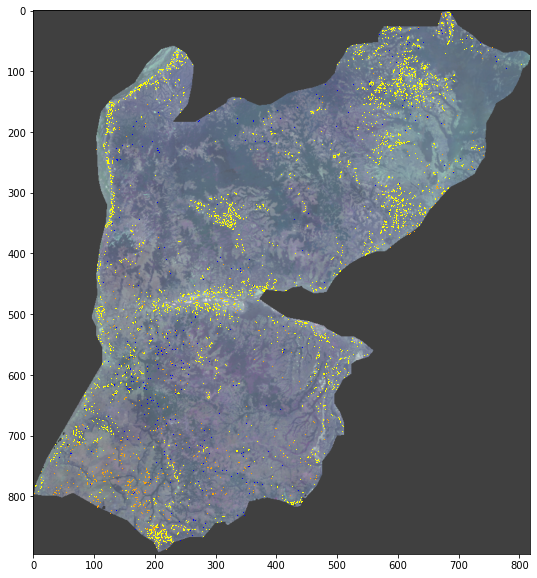

In [313]:
plt.figure(figsize = (10,10))
plt.imshow(nrg,alpha = 0.75)
plt.imshow(Hansen, cmap = cmap1)
plt.imshow(LandTrendr_2014_Resampled, cmap = cmap4)
#plt.imshow(f_s_valid, cmap = cmap3) #red
plt.imshow(f_c, cmap = cmap2)#orange
plt.imshow(s_c, cmap = cmap2)#yellow
#plt.savefig('/gws/nopw/j04/ai4er/users/jl2182/data/Figures/LC_LT_GFC_Compariosn/2019_comparison.png')
#plt.savefig('/gws/nopw/j04/ai4er/users/jl2182/data/Figures/LC_LT_GFC_Compariosn/2019_comparison.tif')